# Algorythme (inspired by clustered) :

The algorythme plot datas as points in a space (if you have 2 parameteres there will be 2 dimensions, if you have X parameteres there will X dimensions). If you want to have the cathegorie of a point (Y), the algorythme will find the nearest point and assign his category to the Y point. The operation is simple enough for bank fraud (example at the end).

### Install pandas :

In [7]:
!pip install pandas

### Import pandas :

In [8]:
import pandas as pd

In [9]:
class Nuage_Point:
    def __init__(self, caracteristique_coordone = []):
        self.point_dic = {}
        self.Nombre_coordone = len(caracteristique_coordone)
        for x in range (0, self.Nombre_coordone):
            self.point_dic[caracteristique_coordone[x]] = []
        self.point_dic["Categorie"] = []
        self.point_pandas = pd.DataFrame(self.point_dic)

    def ajouter_point(self, coordone =[], caracteritique = ""):
        self.point_a_ajouter_list = []
        for x in coordone:
            self.point_a_ajouter_list.append(x)
        self.point_a_ajouter_list.append(caracteritique)
        self.point_pandas.loc[len(self.point_pandas.index)] = self.point_a_ajouter_list

    def point_proche(self, pointdonne = []):
        self.somme = 0
        self.somme2 = 0
        self.best_caract = ""
        for x in range (0, len(self.point_pandas.index)):
            self.point_distance = []
            for z in range (0, self.Nombre_coordone):
                self.point_distance.append(self.point_pandas.iloc[x,z])
            self.somme = 0
            for y in range (0, self.Nombre_coordone):
                self.somme = self.somme + pow((self.point_distance[y]- pointdonne[y]), 2)
            if self.somme < self.somme2 or x == 0:
                self.somme2 = self.somme
                self.best_caract = self.point_pandas.iloc[x,self.Nombre_coordone]
        return self.best_caract
    
    def export(self):
        self.xml_export = self.point_pandas.to_xml()
        return self.xml_export    

### Install matplotlib (preferably 3.6) :

In [10]:
!pip install matplotlib==3.6

### Import random and pyplot from matplotlib :

In [11]:
import random
from matplotlib import pyplot as plt

# Generate data (imitating reality) and test:


Transaction per minute : 2
Amount : 30
The transaction is :  No Fraud


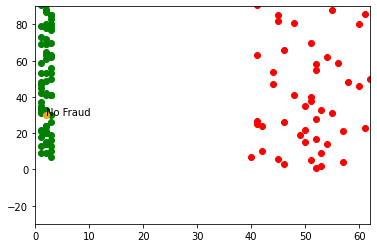

In [14]:
test = Nuage_Point(["transaction_x", "amount_y"])

XATest = float(input("Transaction per minute : "))
YATest = float(input("Amount : "))

for y in range (1, 2000) :
    x1 = random.randint(40, 90)

    test.ajouter_point([x1, y], "Fraud") # x = transaction per minute, y = amount
    plt.plot(x1, y, marker="o", color="red")

    x1 = random.randint(1, 20)
    y1 = random.randint (60000, 1000000)
    test.ajouter_point([x1, y1], "Fraud") # x = transaction per minute, y = amount
    plt.plot(x1, y1, marker="o", color="red")

    y2 = random.randint(6, 2000)
    x2 = random.randint(1,3)
    test.ajouter_point([x2, y2], "No Fraud")
    plt.plot(x2, y2, marker="o", color="green")

for x in range (0,10):
    y2 = random.randint(50000, 1000000)
    x2 = 1
    test.ajouter_point([x2, y2], "No Fraud")

    plt.plot(x2, y2, marker="o", color="red")
    
Transaction_Caracteristique = test.point_proche([XATest, YATest])
print("The transaction is : ", Transaction_Caracteristique)

plt.plot(XATest, YATest, marker="o", color="orange")
plt.annotate(Transaction_Caracteristique, (XATest, YATest))
plt.axis([0, XATest+60, YATest-60, YATest+60])
plt.show()

# Download .xml file :

In [15]:
xml_export = test.export()
                         
with open('data.XML', 'w') as f:
    f.write(xml_export)